In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
color=sns.color_palette()
import sklearn.metrics as metrics

# Importing the data

In [42]:
default_df=pd.read_csv('Default.csv')
default_df.head()

,default,student,balance,income
0,No,No,729.53,44361.63
1,No,Yes,817.18,12106.13
2,No,No,1073.55,31767.14
3,No,No,529.25,35704.49
4,No,No,785.66,38463.50


# lets check number of observation and variable

In [43]:
print('The number of row(observation) is',default_df.shape[0],'\n' 'The number of column(variable)',default_df.shape[1])

The number of row(observation) is 10000 
The number of column(variable) 4


# Descriptive statistics for continuous variable

In [44]:
default_df.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374877,33516.981852
std,483.714957,13336.639582
min,0.000000,771.970000
25%,481.732500,21340.460000
50%,823.635000,34552.645000
75%,1166.305000,43807.730000
max,2654.320000,73554.230000


# Univariate analysis- balance and income

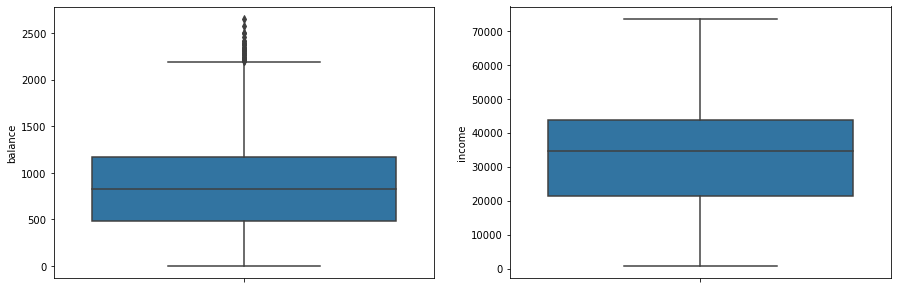

In [45]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(y=default_df['balance'])

plt.subplot(1,2,2)
sns.boxplot(y=default_df['income'])
plt.show()

# Univariate  analysis- student and default

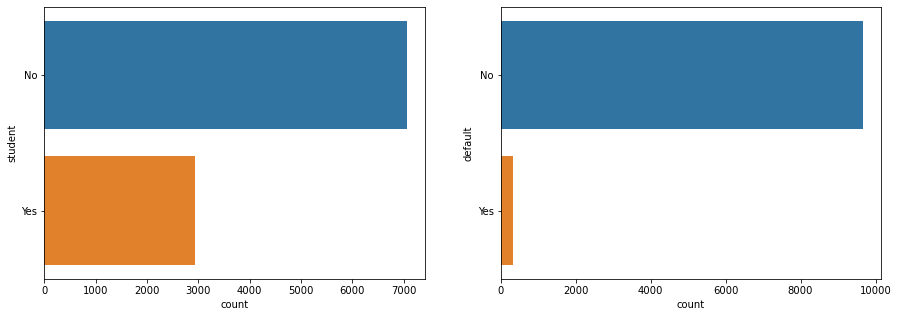

In [46]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(y=default_df['student'])

plt.subplot(1,2,2)
sns.countplot(y=default_df['default'])
plt.show()

In [47]:
default_df['student'].value_counts()

No     7056
Yes    2944
Name: student, dtype: int64

In [48]:
default_df['student'].value_counts(normalize=True)

No     0.7056
Yes    0.2944
Name: student, dtype: float64

In [49]:
default_df['default'].value_counts()

No     9667
Yes     333
Name: default, dtype: int64

In [50]:
default_df['default'].value_counts(normalize=True)

No     0.9667
Yes    0.0333
Name: default, dtype: float64

# Univariate analysis

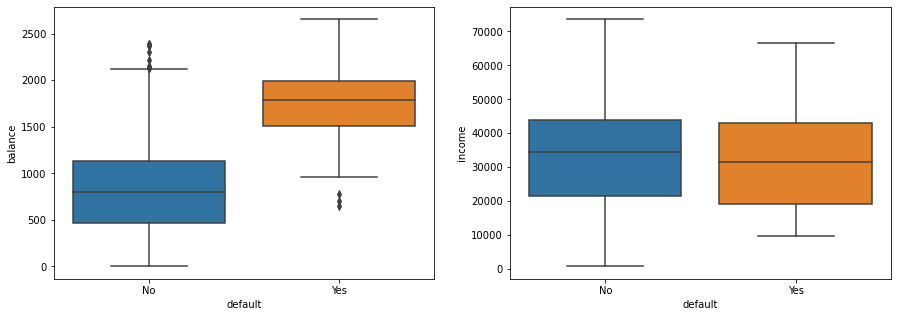

In [51]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(default_df['default'],default_df['balance'])

plt.subplot(1,2,2)
sns.boxplot(default_df['default'],default_df['income'])
plt.show()

# Inference- defaulters seems to have outstanding balance compare to non defaulters. defaulters income seems lower compare to non defaulters

In [52]:
pd.crosstab(default_df['student'],default_df['default'],normalize='index').round(2)

default,No,Yes
student,,
No,0.97,0.03
Yes,0.96,0.04


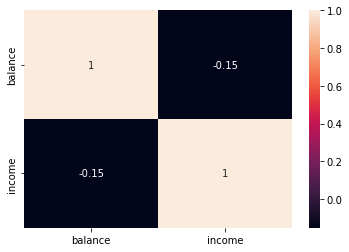

In [53]:
sns.heatmap(default_df[['balance','income']].corr(),annot=True)
plt.show()

In [14]:
# checking null value

In [54]:
default_df.isnull().sum()

default    0
student    0
balance    0
income     0
dtype: int64

# As we can see there is no null value  in the data set

In [16]:
# Treating outliers present in the balance variable

In [55]:
Q1,Q3=default_df['balance'].quantile([.25,.75])
IQR=Q3-Q1
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR

In [56]:
df=default_df[default_df['balance']>UL]

In [57]:
df

,default,student,balance,income
173,Yes,Yes,2205.80,14271.49
1136,Yes,No,2499.02,51504.29
1160,Yes,Yes,2502.68,14947.52
1359,Yes,No,2220.97,40725.10
1502,Yes,Yes,2332.88,11770.23
1609,Yes,Yes,2269.95,18021.11
2096,Yes,Yes,2261.85,20030.17
2140,No,Yes,2308.89,19110.27
2929,Yes,Yes,2387.31,28296.91
3162,Yes,Yes,2415.32,17429.50


In [58]:
df1=default_df[default_df['balance']<LL]

In [59]:
df1

,default,student,balance,income


In [60]:
df['default'].count()

31

In [61]:
df['default'].value_counts()

Yes    26
No      5
Name: default, dtype: int64

In [62]:
df['default'].value_counts(normalize=True)

Yes    0.83871
No     0.16129
Name: default, dtype: float64

In [63]:
default_df['balance']=np.where(default_df['balance']>UL,UL,default_df['balance'])

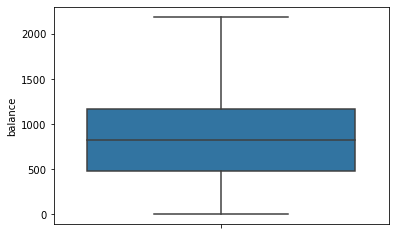

In [64]:
sns.boxplot(y=default_df['balance'])
plt.show()

# Outliers have been replaced with transformation method

In [27]:
#  from sklearn import label encoder

In [65]:
default_df=pd.get_dummies(default_df,drop_first=True)

In [66]:
default_df.head(10)

,balance,income,default_Yes,student_Yes
0,729.53,44361.63,0,0
1,817.18,12106.13,0,1
2,1073.55,31767.14,0,0
3,529.25,35704.49,0,0
4,785.66,38463.50,0,0
5,919.59,7491.56,0,1
6,825.51,24905.23,0,0
7,808.67,17600.45,0,1
8,1161.06,37468.53,0,0
9,0.00,29275.27,0,0


# relabeling the column as per the original names

In [67]:
default_df.columns

Index(['balance', 'income', 'default_Yes', 'student_Yes'], dtype='object')

In [68]:
default_df.columns=['balance','income','default','student']

In [69]:
default_df.head()

,balance,income,default,student
0,729.53,44361.63,0,0
1,817.18,12106.13,0,1
2,1073.55,31767.14,0,0
3,529.25,35704.49,0,0
4,785.66,38463.50,0,0


# split the data into independent variable and dependent variable

In [70]:
x=default_df.drop('default',axis=1)
y=default_df['default']

In [71]:
x.head()

,balance,income,student
0,729.53,44361.63,0
1,817.18,12106.13,1
2,1073.55,31767.14,0
3,529.25,35704.49,0
4,785.66,38463.50,0


In [72]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: default, dtype: uint8

In [73]:
y.value_counts()

0    9667
1     333
Name: default, dtype: int64

# partitioning the data into train and test

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=21,stratify=y)

# Why stratify = y ?
# note, because this data is highly imbalanced and could possibly result into different #proportions in the y variables between train and test set

In [76]:
print(x_train.shape)
print(x_test.shape)

(7000, 3)
(3000, 3)


In [77]:
print(y_train.value_counts(normalize=True).round(2))
print()
print(y_test.value_counts(normalize=True).round())
      

0    0.97
1    0.03
Name: default, dtype: float64

0    1.0
1    0.0
Name: default, dtype: float64


# Treating target imbalance using smote

In [78]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=33,sampling_strategy=0.75)
x_res,y_res=sm.fit_resample(x_train,y_train)

In [81]:
print(y.shape)
print()
print(y_res.shape)

(10000,)

(11842,)


In [82]:
y.value_counts()

0    9667
1     333
Name: default, dtype: int64

In [83]:
y_res.value_counts()

0    6767
1    5075
Name: default, dtype: int64

In [85]:
default_smote=pd.concat([x_res,y_res],axis=1)

In [87]:
#balance datasheet
default_smote.groupby('default').mean()

,balance,income,student
default,,,
0,807.913022,33555.565605,0.288902
1,1748.067687,31074.712267,0.337537


In [88]:
# originaldata set imbalance data 

default_df.groupby('default').mean()

,balance,income,student
default,,,
0,803.870400,33566.166610,0.291404
1,1736.593536,32089.146847,0.381381


# Building model using logistic regression

In [89]:
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression()


# Now, importing statsmodels modules

In [90]:
import statsmodels.formula.api as SM

In [92]:
default_df.columns

Index(['balance', 'income', 'default', 'student'], dtype='object')

In [93]:
#imbalance
train=pd.concat([x_train,y_train],axis=1)
#balance
train_smote=pd.concat([x_res,y_res],axis=1)
#validation data
test=pd.concat([x_test,y_test],axis=1)


In [94]:
print(train.shape)
print()
print(train_smote.shape)
print()
print(test.shape)

(7000, 4)

(11842, 4)

(3000, 4)


In [95]:
train_smote.head()

,balance,income,student,default
0,595.07,29842.89,0,0
1,290.68,37603.97,0,0
2,758.47,38018.15,0,0
3,500.65,31353.75,0,0
4,1391.41,30427.20,0,0


In [96]:
f_1 = 'default ~ balance + income + student'

# Fitting the logistic regression model on imbalance dataset

In [97]:
model1 = SM.logit(formula=f_1, data=train).fit()

Optimization terminated successfully.
         Current function value: 0.078006
         Iterations 10


In [98]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 7000
Model:                          Logit   Df Residuals:                     6996
Method:                           MLE   Df Model:                            3
Date:                Sat, 15 Jul 2023   Pseudo R-squ.:                  0.4657
Time:                        01:29:05   Log-Likelihood:                -546.04
converged:                       True   LL-Null:                       -1021.9
Covariance Type:            nonrobust   LLR p-value:                5.419e-206
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.4580      0.578    -18.080      0.000     -11.592      -9.324
balance        0.0059      0.000     20.744      0.000       0.005       0.006
income      -1.53e-05   9.98e-06     -1.534      0.125   -3.49e-05    4.25e-06
student       -1.0130      0.282     -3.592      0.000      -1.566      -0.460
==============================================================================

Possibly complete quasi-separation: A fraction 0.16 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

# Validating the model on train set

In [99]:
y_pred_train = np.where(model1.predict(train)>0.5,1,0)

In [100]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [101]:
confusion_matrix(y_train, y_pred_train)

array([[6737,   30],
       [ 158,   75]], dtype=int64)

In [102]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6767
           1       0.71      0.32      0.44       233

    accuracy                           0.97      7000
   macro avg       0.85      0.66      0.72      7000
weighted avg       0.97      0.97      0.97      7000



In [103]:
print(accuracy_score(y_train, y_pred_train))

0.9731428571428572


# Validating the model on test set

In [104]:
y_pred_test = np.where(model1.predict(test)>0.5,1,0)

In [105]:
confusion_matrix(y_test, y_pred_test)

array([[2888,   12],
       [  66,   34]], dtype=int64)

In [106]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2900
           1       0.74      0.34      0.47       100

    accuracy                           0.97      3000
   macro avg       0.86      0.67      0.73      3000
weighted avg       0.97      0.97      0.97      3000



In [107]:
print(accuracy_score(y_test, y_pred_test))

0.974


# Please note, ~ACCURACY is not a good measurement when we have imbalance dataset or probability values
# Model is not overfitting but the recall value is really poor. Basis recall, can we say it's high bias

# Fitting the logistic Regression model on Balanced data


In [108]:
model_2 = SM.logit(formula=f_1, data=train_smote).fit()

Optimization terminated successfully.
         Current function value: 0.236659
         Iterations 8


In [110]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                11842
Model:                          Logit   Df Residuals:                    11838
Method:                           MLE   Df Model:                            3
Date:                Sat, 15 Jul 2023   Pseudo R-squ.:                  0.6535
Time:                        01:37:22   Log-Likelihood:                -2802.5
converged:                       True   LL-Null:                       -8087.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.6320      0.240    -35.967      0.000      -9.102      -8.162
balance        0.0072      0.000     51.698      0.000       0.007       0.007
income      -2.84e-05   4.09e-06     -6.935      0.000   -3.64e-05   -2.04e-05
student       -1.7174      0.120    -14.283      0.000      -1.953      -1.482
==============================================================================
"""

# Training dataset

In [111]:
y_pred_train_smote = np.where(model_2.predict(train_smote)>0.5,1,0)

In [112]:
confusion_matrix(y_res, y_pred_train_smote)

array([[6111,  656],
       [ 500, 4575]], dtype=int64)

In [113]:
print(classification_report(y_res, y_pred_train_smote))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      6767
           1       0.87      0.90      0.89      5075

    accuracy                           0.90     11842
   macro avg       0.90      0.90      0.90     11842
weighted avg       0.90      0.90      0.90     11842



In [114]:
print(accuracy_score(y_res, y_pred_train_smote))

0.9023813545009289


# Test dataset

In [115]:
y_pred_test_smote = np.where(model_2.predict(test)>0.5,1,0)

In [116]:
confusion_matrix(y_test, y_pred_test_smote)

array([[2634,  266],
       [  18,   82]], dtype=int64)

In [117]:
print(classification_report(y_test, y_pred_test_smote))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95      2900
           1       0.24      0.82      0.37       100

    accuracy                           0.91      3000
   macro avg       0.61      0.86      0.66      3000
weighted avg       0.97      0.91      0.93      3000



In [118]:
print(accuracy_score(y_test, y_pred_test_smote))

0.9053333333333333


# Conclusion:
 # we can see that we get better recall value after balancing the data. hence, we prefer to go with model_2